In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [136]:
# read in batter data
batter_train = pd.read_csv('../Modeling_Data/batter_data_modeling.csv')
# read in test data
batter_test = pd.read_csv('../Modeling_Data/batter_test_data.csv')

In [137]:
# split data in TTS
X_train = batter_train.drop(columns=['Name', 'Team', 'POS', 'PTS', 'FPPG'])
y_train = batter_train['FPPG']
# testing 
X_test = batter_test.drop(columns=['Name', 'Team', 'Pos', 'PTS', 'FPPG'])
y_test = batter_test['FPPG']

In [138]:
# scale data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [139]:
# network topology 
model = Sequential()
# input layer
model.add(Input(shape=(X_train.shape[1],)))
# 1st hidden layer
model.add(Dense(32, activation='relu'))
# 2nd hidden layer
model.add(Dense(64, activation='relu'))
# dropout
# 64 dense
# 3rd hidden layer
model.add(Dense(32, activation='relu'))
# dropout
# ouput layer
model.add(Dense(1, activation=None))

In [140]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                608       
_________________________________________________________________
dense_61 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_62 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 33        
Total params: 4,833
Trainable params: 4,833
Non-trainable params: 0
_________________________________________________________________


In [141]:
#complie
model.compile(loss='mse', optimizer='adam', metrics=['mse', tf.keras.metrics.RootMeanSquaredError()])

In [142]:
#fit
results = model.fit(X_train_sc, y_train, epochs=200, batch_size=50, validation_data=(X_test_sc, y_test), verbose=0)

In [143]:
# results
results.history['val_root_mean_squared_error'][-1]

2.5210235118865967

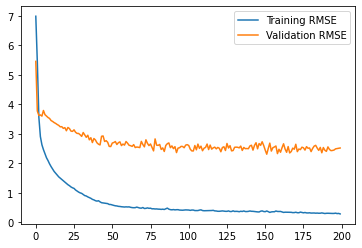

In [144]:
plt.plot(results.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(results.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.legend();

---

In [145]:
# read in batter data
pitcher_train = pd.read_csv('../Modeling_Data/pitcher_data_modeling.csv')
# read in test data
pitcher_test = pd.read_csv('../Modeling_Data/pitcher_test_data.csv')

In [146]:
# split data in TTS
X_train = pitcher_train.drop(columns=['Name', 'Team', 'POS', 'PTS', 'AVG', 'FPPG'])
y_train = pitcher_train['FPPG']
# testing 
X_test = pitcher_test.drop(columns=['Name', 'Team', 'Pos', 'PTS', 'AVG', 'FPPG'])
y_test = pitcher_test['FPPG']

In [147]:
# scale data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [148]:
# network topology 
model = Sequential()
# input layer
model.add(Input(shape=(X_train.shape[1],)))
# 1st hidden layer
model.add(Dense(32, activation='relu'))
# 2nd hidden layer
model.add(Dense(64, activation='relu'))
# 3rd hidden layer
model.add(Dense(32, activation='relu'))
# ouput layer
model.add(Dense(1, activation=None))

In [149]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 32)                480       
_________________________________________________________________
dense_65 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_66 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 33        
Total params: 4,705
Trainable params: 4,705
Non-trainable params: 0
_________________________________________________________________


In [150]:
#complie
model.compile(loss='mse', optimizer='adam', metrics=['mse', tf.keras.metrics.RootMeanSquaredError()])

In [151]:
#fit
results = model.fit(X_train_sc, y_train, epochs=200, batch_size=50, validation_data=(X_test_sc, y_test), verbose=0)

In [152]:
# results
results.history['val_root_mean_squared_error'][-1]

4.180414199829102

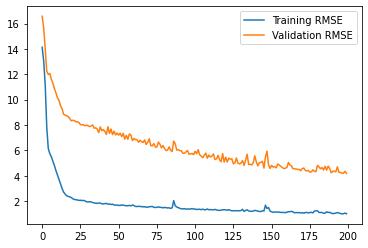

In [153]:
plt.plot(results.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(results.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.legend();